# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Graphillionによるおねえさんの問題の解の導出" data-toc-modified-id="Graphillionによるおねえさんの問題の解の導出-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Graphillionによるおねえさんの問題の解の導出</a></div><div class="lev2 toc-item"><a href="#おねえさんの問題とは" data-toc-modified-id="おねえさんの問題とは-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>おねえさんの問題とは</a></div><div class="lev1 toc-item"><a href="#評価" data-toc-modified-id="評価-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>評価</a></div><div class="lev2 toc-item"><a href="#方向性" data-toc-modified-id="方向性-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>方向性</a></div><div class="lev2 toc-item"><a href="#実行環境" data-toc-modified-id="実行環境-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>実行環境</a></div><div class="lev2 toc-item"><a href="#方法" data-toc-modified-id="方法-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>方法</a></div><div class="lev1 toc-item"><a href="#設定" data-toc-modified-id="設定-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>設定</a></div><div class="lev2 toc-item"><a href="#関数定義" data-toc-modified-id="関数定義-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>関数定義</a></div><div class="lev2 toc-item"><a href="#変数定義" data-toc-modified-id="変数定義-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>変数定義</a></div><div class="lev1 toc-item"><a href="#計測" data-toc-modified-id="計測-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>計測</a></div><div class="lev2 toc-item"><a href="#格子グラフ" data-toc-modified-id="格子グラフ-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>格子グラフ</a></div><div class="lev2 toc-item"><a href="#有向格子グラフ" data-toc-modified-id="有向格子グラフ-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>有向格子グラフ</a></div><div class="lev2 toc-item"><a href="#双方向リンク格子グラフ" data-toc-modified-id="双方向リンク格子グラフ-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>双方向リンク格子グラフ</a></div><div class="lev1 toc-item"><a href="#実行結果" data-toc-modified-id="実行結果-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>実行結果</a></div><div class="lev2 toc-item"><a href="#Lab-iMac(Late-2009)" data-toc-modified-id="Lab-iMac(Late-2009)-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Lab iMac(Late 2009)</a></div>

# Graphillionによるおねえさんの問題の解の導出

## おねえさんの問題とは

格子グラフの対角２頂点をつなぐ経路はいくつ存在するか。ただし同じところを２度通ってはいけない。  
n×nの格子グラフの解の個数は以下の通り。

|n|経路の数|
|:---:|----:|
|1|2|
|2|12|
|3|184|
|4|8512|
|5|1262816|
|6|575780564|
|7|789360053252|
|8|3266598486981642|
|9|41044208702632496804|
|10|1568758030464750013214100|
|11|182413291514248049241470885236|

# 評価
おねえさんの問題を実行し計算限界となるグラフを求める。

## 方向性
有向グラフに対するラッパーと双方向リンクに対するラッパーを適応したパス列挙も行う。  
有向グラフに対するラッパーを適応する場合は、いずれのノードも自身の左側と上側に存在するノードとのリンクは流入リンク、右側と下側に存在するノードとのリンクは流出リンクとする。

## 実行環境
個人所有のPC2台、研究室のPC2台の計4台で行う。詳細なスペックは各PCのセクションを参照。


## 方法

graphillion.tutorialを参考にGrid Graph作成関数を作成。  
その関数で作成したグラフをGrapihillionで読み込み、対角2頂点（スタートノード1、ターゲットノード$(n+1)^2$）を引数にしてgraphillion.GraphSet.pathsを実行。  
実行時間計測はnbextensionsのExecuteTimeを利用する。

# 設定

## 関数定義

In [66]:
import pickle
from os import path, mkdir, makedirs
from functools import reduce

import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from graphillion import GraphSet
from pandas import DataFrame
import pandas as pd

import proposal_packages.directed_graph as dg
import proposal_packages.directed_link as dl

%matplotlib inline

mpl.rcParams['font.family'] = 'Source Han Code JP'

def grid_graph(m, n):
    """
    m*nの格子グラフを返す
    方向性をつけない場合と有向辺ラッパーの適応した場合の計測に使用
    """
    m, n = m + 1, n + 1
    edges = []
    for v in range(1, m * n + 1):
        if v % n != 0:
            edges.append((v, v + 1))
        if v <= (m - 1) * n:
            edges.append((v, v + n))
    return nx.DiGraph(data=edges)

def directed_grid_graph(m, n):
    """
    双方向リンクをもつm*nの格子グラフを返す
    双方向リンクラッパーの計測に使用
    """
    m, n = m + 1, n + 1
    edges = []
    for v in range(1, m * n + 1):
        if v % n != 0:
            edges.append((v, v + 1, 0))
            edges.append((v + 1, v, 0))
        if v <= (m - 1) * n:
            edges.append((v, v + n, 0))
            edges.append((v + n, v, 0))
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)
    return G

def draw_grid_graph(G):
    """
    格子グラフオブジェクトを描画
    """
    universe = GraphSet.universe()
    if not isinstance(universe, nx.Graph):
        universe = nx.Graph(data=list(universe))
    if not isinstance(G, nx.Graph):
        G = nx.Graph(data=G)
    n = sorted(universe[1].keys())[1] - 1
    m = universe.number_of_nodes() // n
    G.add_nodes_from(universe.nodes())
    pos = {}
    for v in range(1, m * n + 1):
        pos[v] = ((v - 1) % n, (m * n - v) // n)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
def dump_universe(m, n, kind="Universe"):
    """
    ユニバースをシリアライズしてフォルダ./dump/grid_graph/Universeに保存する
    """
    table = {"Universe": "undirected_Universe_{}_{}".format(m, n),
                   "bidi2": "bidirectional_Universe_two_virtual_nodes_{}_{}".format(m, n),
                   "bidi1": "bidirectional_Universe_one_virtual_node_{}_{}".format(m, n)}
    p = path.join("dump", "grid_graph", "Universe")
    if not path.exists(p):
        makedirs(p)
    with open(path.join(p, table[kind]), "wb") as fp:
        pickle.dump(GraphSet.universe(), fp)
    
def dump_paths(m, n, paths, kind):
    """
    パス集合をシリアライズしてフォルダ./dump/grid_graph/pathsに保存する
    """
    table = {"undi": "undirected_{}_{}".format(m, n),
                   "dig": "directed_{}_{}".format(m, n),
                   "bidi2": "bidirectional_link_two_virtual_nodes_{}_{}".format(m, n),
                   "bidi1": "bidirectional_link_one_virtual_node_{}_{}".format(m, n)}
    p = path.join("dump", "grid_graph", "paths")
    if not path.exists(p):
        makedirs(p)
    with open(path.join(p, table[kind]), "wb") as fp:
        paths.dump(fp)

## 変数定義

In [67]:
m, n = 9, 9 # 格子グラフの規模
s, t = 1, (n+1)*(n+1) # スタート、ターゲット

# 計測

## 格子グラフ

ユニバース定義と格子グラフ生成  
このユニバースは有向グラフでも使用する

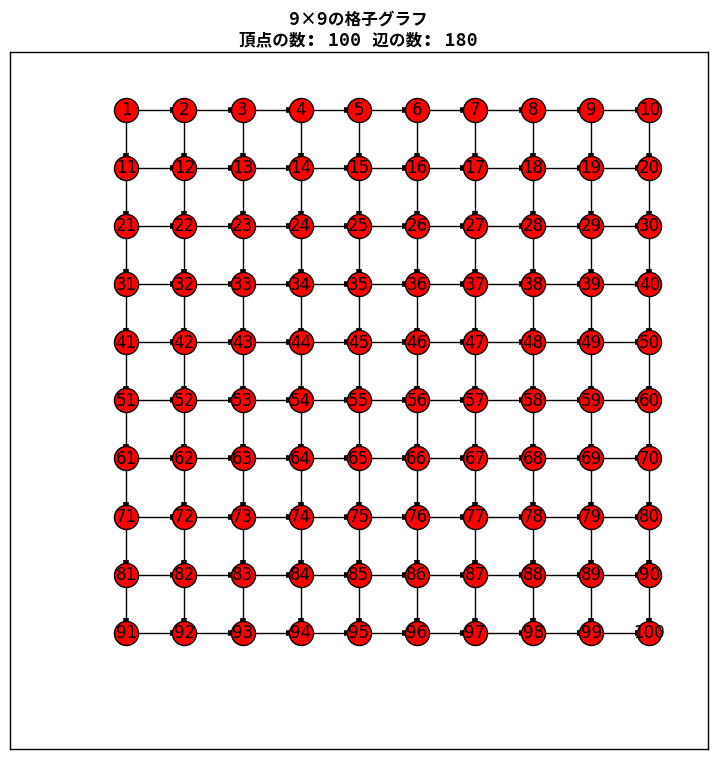

In [68]:
G = grid_graph(m, n)
GraphSet.set_universe(G.edges(), traversal="as-is")
plt.figure(figsize=(m, n))
plt.title("{}×{}の格子グラフ\n頂点の数: {} 辺の数: {}".format(m, n, len(G.nodes()), len(G.edges())))
draw_grid_graph(G)

ユニバースをシリアライズ

In [69]:
dump_universe(m, n)

パス列挙

In [70]:
paths = GraphSet.paths(s, t)

パスをシリアライズ

In [71]:
dump_paths(m, n, paths, "undi")

## 有向格子グラフ

ユニバースと`grid_graph(m, n)`で生成したグラフ`G`をそのまま使用する

パス列挙

In [72]:
dig_paths = dg.directed_paths(G, s, t)

In [73]:
len(dig_paths)

48620

In [74]:
dump_paths(m, n, dig_paths, "dig")

## 双方向リンク格子グラフ

仮想ノード１個追加と２個追加の場合でユニバースが異なる

仮想ノード追加前の通常の格子グラフのノード数を$n$、双方向リンク数を$l$とする  
すると双方向リンクラッパー適応後のグラフは以下に示すように規模が増大する

* **仮想ノード2個追加の場合**    
ノード数$n+2l$、双方向リンク数$4l$


* **仮想ノード1個追加の場合**  
ノード数$n + l$、双方向リンク数$3l$

ここでは，仮想ノード１個追加のラッパーの計測のみを行う

グラフとedgelistを生成

In [75]:
BiG = directed_grid_graph(m, n)
edgelist = [(i, j, attr["weight"]) for i,j,attr in BiG.edges(data=True)]

ユニバース定義

In [76]:
dl.read_edgelist(edgelist)
BiG_appended_one_virtual_node = dl.append_virtual_nodes()
GraphSet.set_universe(BiG_appended_one_virtual_node, traversal="as-is")
print("仮想ノード1個追加後の双方向リンク格子グラフ")
print("number of nodes", len(set(reduce(lambda x,y: x+y, [[i,j] for i,j,w in BiG_appended_one_virtual_node]))))
print("number of edges", len(BiG_appended_one_virtual_node))

仮想ノード1個追加後の双方向リンク格子グラフ
number of nodes 280
number of edges 540


ユニバースをシリアライズ

In [77]:
dump_universe(m, n, kind="bidi1")

パス列挙

In [ ]:
bidi1_paths = dl.directed_paths(s, t)

# 実行結果

部分グラフの列挙が完了していると数え上げが早くなる現象については考慮していない．  
詳しくは引き継ぎ資料のprofilingを参照．

## Lab iMac(Late 2009)

**スペック**

|項目            |                                  |
|:----------------|:----------------------------------|
|OS              |macOS v10.12.4 Sierra     |
|プロセッサ|Intel Core i5-750 @ 2.66GHz    |
|メモリ（RAM）   |16GB                           |

**実行結果（単位：秒）**

|グラフ|方向性なし|有向グラフ|双方向リンク（仮想ノード1個）|
|:---:|:----:|:---:|:---:|:---:|
|$1 \times 1$|0.006|0.004|0.005|
|$2 \times 2$|0.007|0.007|0.006|
|$3 \times 3$|0.004|0.0014|0.076|
|$4 \times 4$|0.016|0.007|0.126|
|$5 \times 5$|0.079|0.031|0.561|
|$6 \times 6$|0.039|0.106|1.80|
|$7 \times 7$|0.305|0.183|14.6|
|$8 \times 8$|0.233|0.247|18.6|
|$9 \times 9$|0.507|0.530|1|
|$10 \times 10$|0.233|0.247|18.6|